In [28]:
import pandas as pd
import numpy as np
from sklearn import tree
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [29]:
hz_train=pd.read_csv(r"C:/Users/Admin/Desktop/python/project 4/Hazard_train.csv")

In [30]:
hz_test=pd.read_csv(r"c:/Users/Admin/Desktop/python/project 4/Hazard_test_share.csv")

In [31]:
hz.head()

,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15,data
0,2.0,10,23,4,N,K,Y,B,D,E,...,37,1,11,2,Y,N,E,2,1,train
1,6.0,3,18,2,B,H,N,B,B,D,...,34,1,12,7,Y,N,C,3,3,train
2,4.0,5,20,4,B,K,N,B,B,E,...,40,1,17,4,Y,N,D,1,1,train
3,1.0,4,7,5,N,H,N,B,B,B,...,37,1,11,6,Y,N,D,2,1,train
4,21.0,10,21,6,N,C,Y,B,C,D,...,40,1,6,6,N,N,D,5,5,train


In [32]:
hz_test['Hazard']=np.nan
hz_train["data"]="train"
hz_test["data"]="test"
hz=pd.concat([hz_train,hz_test],axis=0 )

In [33]:
del hz['Id']

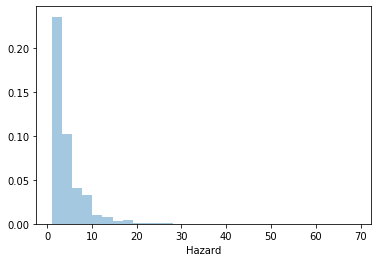

In [34]:
sns.distplot(hz['Hazard'],kde=False,bins=30,norm_hist=True)

In [35]:
hz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50999 entries, 0 to 10199
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hazard  40799 non-null  float64
 1   T1_V1   50999 non-null  int64  
 2   T1_V2   50999 non-null  int64  
 3   T1_V3   50999 non-null  int64  
 4   T1_V4   50999 non-null  object 
 5   T1_V5   50999 non-null  object 
 6   T1_V6   50999 non-null  object 
 7   T1_V7   50999 non-null  object 
 8   T1_V8   50999 non-null  object 
 9   T1_V9   50999 non-null  object 
 10  T1_V10  50999 non-null  int64  
 11  T1_V11  50999 non-null  object 
 12  T1_V12  50999 non-null  object 
 13  T1_V13  50999 non-null  int64  
 14  T1_V14  50999 non-null  int64  
 15  T1_V15  50999 non-null  object 
 16  T1_V16  50999 non-null  object 
 17  T1_V17  50999 non-null  object 
 18  T2_V1   50999 non-null  int64  
 19  T2_V2   50999 non-null  int64  
 20  T2_V3   50999 non-null  object 
 21  T2_V4   50999 non-null  int64  
 22

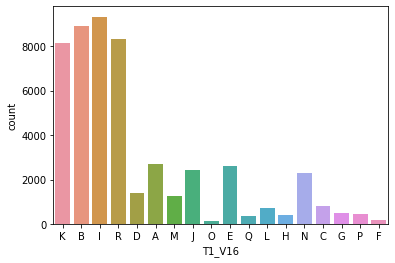

In [36]:
sns.countplot(x='T1_V16',data=hz)

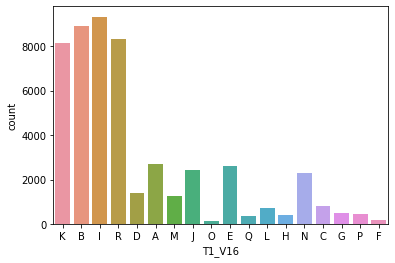

In [37]:
sns.countplot(x='T1_V16',data=hz)

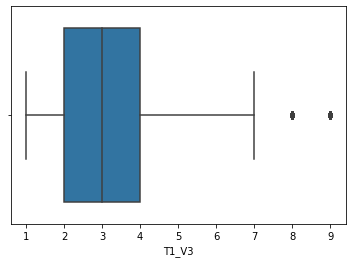

In [38]:
sns.boxplot(x='T1_V3',data=hz)

In [39]:
# Understand categorical columns
cat_cols=hz.select_dtypes(['object']).columns
print(cat_cols)

Index(['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11',
       'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
       'T2_V12', 'T2_V13', 'data'],
      dtype='object')


In [40]:
# Understand categorical columns
num_cols=hz.select_dtypes(['int64']).columns
print(num_cols)

Index(['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1',
       'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V14', 'T2_V15'],
      dtype='object')


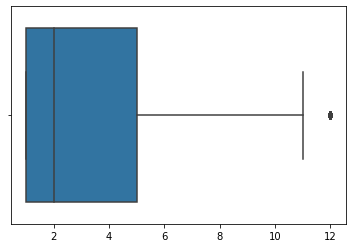

In [42]:
sns.boxplot(x=['T2_V15'],data=hz)

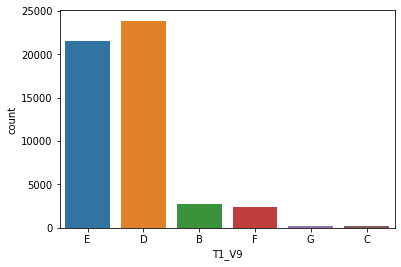

In [43]:
sns.countplot(x="T1_V9", data=hz)

In [44]:
cat_cols = cat_cols[:-1] # we do not need to consider the 'data' column
print(cat_cols)


Index(['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11',
       'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
       'T2_V12', 'T2_V13'],
      dtype='object')


In [45]:
for col in cat_cols:
    print('-----', col, '-----')
    print(hz[col].nunique()) # No. of unique values on the categorical col
    print(hz[col].unique()) # The actual unique values
    print(hz[col].value_counts()) # The count of each of the unique values


----- T1_V4 -----
8
['N' 'B' 'C' 'W' 'E' 'S' 'G' 'H']
N    25112
B    12502
C     4869
W     3480
E     2702
S     1051
G      669
H      614
Name: T1_V4, dtype: int64
----- T1_V5 -----
10
['K' 'H' 'C' 'I' 'A' 'B' 'D' 'J' 'E' 'L']
K    14138
A    10900
H    10137
C     7845
I     4297
B     3335
J      188
D      149
L        5
E        5
Name: T1_V5, dtype: int64
----- T1_V6 -----
2
['Y' 'N']
N    28550
Y    22449
Name: T1_V6, dtype: int64
----- T1_V7 -----
4
['B' 'D' 'A' 'C']
B    47982
D     2126
A      546
C      345
Name: T1_V7, dtype: int64
----- T1_V8 -----
4
['D' 'B' 'C' 'A']
B    46391
D     2028
C     1547
A     1033
Name: T1_V8, dtype: int64
----- T1_V9 -----
6
['E' 'D' 'B' 'F' 'G' 'C']
D    23859
E    21491
B     2748
F     2432
C      251
G      218
Name: T1_V9, dtype: int64
----- T1_V11 -----
12
['H' 'L' 'B' 'N' 'A' 'E' 'J' 'I' 'F' 'K' 'M' 'D']
B    17047
H    15381
L     7003
J     6197
A     1556
I     1364
F      544
M      541
E      450
N      419
D      258
K      2

In [46]:
for col in hz.select_dtypes(["object"]).columns:
  print(col,":",hz[col].value_counts(normalize=True)*100)

T1_V4 : N    49.240181
B    24.514206
C     9.547246
W     6.823663
E     5.298143
S     2.060825
G     1.311790
H     1.203945
Name: T1_V4, dtype: float64
T1_V5 : K    27.722112
A    21.372968
H    19.876860
C    15.382655
I     8.425655
B     6.539344
J     0.368635
D     0.292163
L     0.009804
E     0.009804
Name: T1_V5, dtype: float64
T1_V6 : N    55.98149
Y    44.01851
Name: T1_V6, dtype: float64
T1_V7 : B    94.084198
D     4.168709
A     1.070609
C     0.676484
Name: T1_V7, dtype: float64
T1_V8 : B    90.964529
D     3.976549
C     3.033393
A     2.025530
Name: T1_V8, dtype: float64
T1_V9 : D    46.783270
E    42.140042
B     5.388341
F     4.768721
C     0.492167
G     0.427459
Name: T1_V9, dtype: float64
T1_V11 : B    33.426146
H    30.159415
L    13.731642
J    12.151219
A     3.051040
I     2.674562
F     1.066688
M     1.060805
E     0.882370
N     0.821585
D     0.505892
K     0.468637
Name: T1_V11, dtype: float64
T1_V12 : B    91.962588
D     3.086335
C     2.735348
A   

In [47]:
k=hz['T1_V5'].value_counts()
for col in k.axes[0][0:6]:
    print(col)
    var_name = 'T1_V5'+col.replace(' ','_')
    print(var_name)
    hz[var_name] = np.where(hz['T1_V5']==col,1,0)

K
T1_V5K
A
T1_V5A
H
T1_V5H
C
T1_V5C
I
T1_V5I
B
T1_V5B


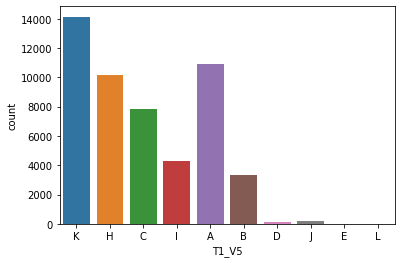

In [48]:
sns.countplot(x="T1_V5", data=hz)

In [49]:
hz['T2_V11']=np.where(hz['T2_V11']=="Y",1,0)
hz['T2_V12']=np.where(hz['T2_V12']=="Y",1,0)
hz['T2_V3']=np.where(hz['T2_V3']=="Y",1,0)
hz['T1_V17']=np.where(hz['T1_V17']=="Y",1,0)
hz['T1_V6']=np.where(hz['T1_V6']=="Y",1,0)

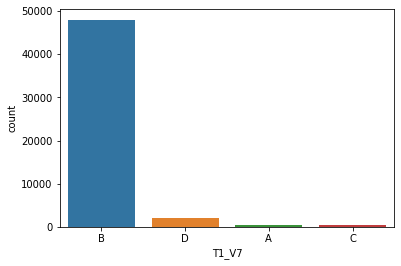

In [50]:
sns.countplot(x="T1_V7", data=hz)

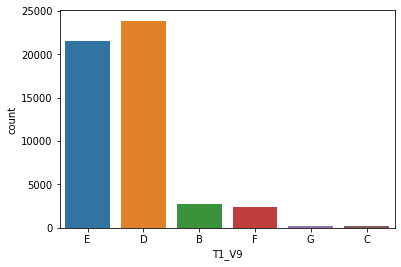

In [51]:
sns.countplot(x="T1_V9", data=hz)

In [52]:
k=hz['T1_V9'].value_counts()
for col in k.axes[0][0:2]:
    var_name = 'T1_V9'+col.replace(' ','_')
    print(var_name)
    hz[var_name] = np.where(hz['T1_V9']==col,1,0)

T1_V9D
T1_V9E


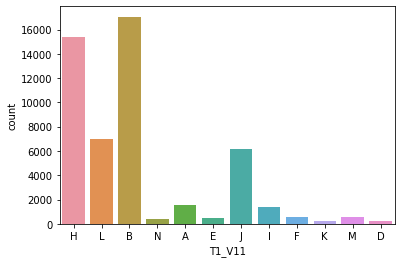

In [53]:
sns.countplot(x="T1_V11", data=hz)

In [54]:
k=hz['T1_V11'].value_counts()
for col in k.axes[0][0:4]:
    var_name = 'T1_V11'+col.replace(' ','_')
    print(var_name)
    hz[var_name] = np.where(hz['T1_V11']==col,1,0)

T1_V11B
T1_V11H
T1_V11L
T1_V11J


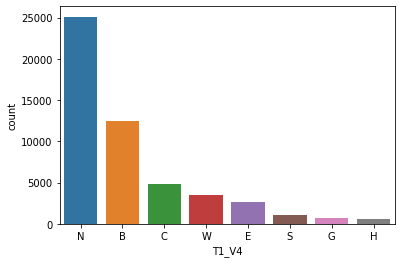

In [55]:
sns.countplot(x="T1_V4", data=hz)

In [56]:
k=hz['T1_V4'].value_counts()
for col in k.axes[0][0:3]:
    var_name = 'T1_V4'+col.replace(' ','_')
    print(var_name)
    hz[var_name] = np.where(hz['T1_V4']==col,1,0)

T1_V4N
T1_V4B
T1_V4C


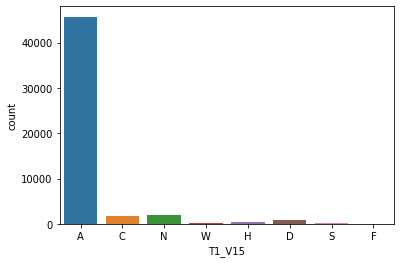

In [57]:
sns.countplot(x="T1_V15", data=hz)

In [58]:
hz.drop(["T1_V7",'T1_V15'],axis=1,inplace=True)

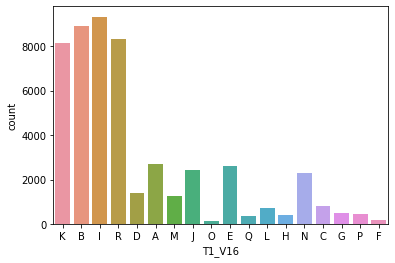

In [59]:
sns.countplot(x="T1_V16", data=hz)

In [60]:
k=hz['T1_V16'].value_counts()
for col in k.axes[0][0:3]:
    var_name = 'T1_V16'+col.replace(' ','_')
    print(var_name)
    hz[var_name] = np.where(hz['T1_V16']==col,1,0)

T1_V16I
T1_V16B
T1_V16R


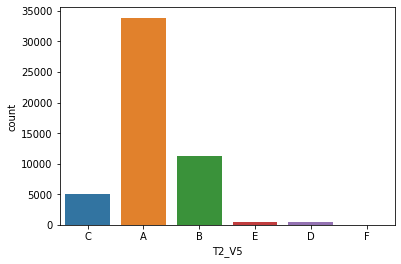

In [61]:
sns.countplot(x="T2_V5", data=hz)

In [62]:
k=hz['T2_V5'].value_counts()
for col in k.axes[0][0:2]:
    var_name = 'T2_V5'+col.replace(' ','_')
    print(var_name)
    hz[var_name] = np.where(hz['T2_V5']==col,1,0)

T2_V5A
T2_V5B


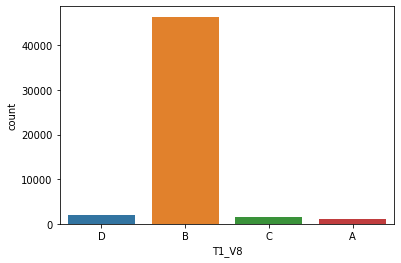

In [63]:
sns.countplot(x="T1_V8", data=hz)

In [64]:
hz.drop('T1_V8',axis=1,inplace=True)

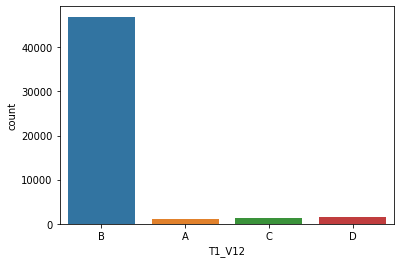

In [65]:
sns.countplot(x="T1_V12", data=hz)

In [66]:
k=hz['T1_V12'].value_counts()
for col in k.axes[0][0:1]:
    var_name = 'T1_V12'+col.replace(' ','_')
    print(var_name)
    hz[var_name] = np.where(hz['T1_V12']==col,1,0)

T1_V12B


In [67]:
hz.dtypes

Hazard     float64
T1_V1        int64
T1_V2        int64
T1_V3        int64
T1_V4       object
T1_V5       object
T1_V6        int32
T1_V9       object
T1_V10       int64
T1_V11      object
T1_V12      object
T1_V13       int64
T1_V14       int64
T1_V16      object
T1_V17       int32
T2_V1        int64
T2_V2        int64
T2_V3        int32
T2_V4        int64
T2_V5       object
T2_V6        int64
T2_V7        int64
T2_V8        int64
T2_V9        int64
T2_V10       int64
T2_V11       int32
T2_V12       int32
T2_V13      object
T2_V14       int64
T2_V15       int64
data        object
T1_V5K       int32
T1_V5A       int32
T1_V5H       int32
T1_V5C       int32
T1_V5I       int32
T1_V5B       int32
T1_V9D       int32
T1_V9E       int32
T1_V11B      int32
T1_V11H      int32
T1_V11L      int32
T1_V11J      int32
T1_V4N       int32
T1_V4B       int32
T1_V4C       int32
T1_V16I      int32
T1_V16B      int32
T1_V16R      int32
T2_V5A       int32
T2_V5B       int32
T1_V12B      int32
dtype: objec

In [68]:
hz.head()

,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V9,T1_V10,T1_V11,...,T1_V11J,T1_V4N,T1_V4B,T1_V4C,T1_V16I,T1_V16B,T1_V16R,T2_V5A,T2_V5B,T1_V12B
0,2.0,10,23,4,N,K,1,E,2,H,...,0,1,0,0,0,0,0,0,0,1
1,6.0,3,18,2,B,H,0,D,8,L,...,0,0,1,0,0,1,0,1,0,1
2,4.0,5,20,4,B,K,0,E,7,H,...,0,0,1,0,0,0,0,0,0,1
3,1.0,4,7,5,N,H,0,B,8,B,...,0,1,0,0,0,1,0,0,1,1
4,21.0,10,21,6,N,C,1,D,12,L,...,0,1,0,0,1,0,0,1,0,1


In [69]:
hz.shape

(50999, 52)

In [70]:
hz.isnull().sum()

Hazard     10200
T1_V1          0
T1_V2          0
T1_V3          0
T1_V4          0
T1_V5          0
T1_V6          0
T1_V9          0
T1_V10         0
T1_V11         0
T1_V12         0
T1_V13         0
T1_V14         0
T1_V16         0
T1_V17         0
T2_V1          0
T2_V2          0
T2_V3          0
T2_V4          0
T2_V5          0
T2_V6          0
T2_V7          0
T2_V8          0
T2_V9          0
T2_V10         0
T2_V11         0
T2_V12         0
T2_V13         0
T2_V14         0
T2_V15         0
data           0
T1_V5K         0
T1_V5A         0
T1_V5H         0
T1_V5C         0
T1_V5I         0
T1_V5B         0
T1_V9D         0
T1_V9E         0
T1_V11B        0
T1_V11H        0
T1_V11L        0
T1_V11J        0
T1_V4N         0
T1_V4B         0
T1_V4C         0
T1_V16I        0
T1_V16B        0
T1_V16R        0
T2_V5A         0
T2_V5B         0
T1_V12B        0
dtype: int64

In [71]:
for col in hz.columns:
    if(hz[col].isnull().sum()>0):
        print(col)

Hazard


In [72]:
for col in hz.columns:
    if (col not in ['Hazard','data'])& (hz[col].isnull().sum()>0):
        hz.loc[hz[col].isnull(),col]=hz.loc[hz['data']=='train',col].mean()
 

In [73]:
hz.select_dtypes(['object']).columns

Index(['T1_V4', 'T1_V5', 'T1_V9', 'T1_V11', 'T1_V12', 'T1_V16', 'T2_V5',
       'T2_V13', 'data'],
      dtype='object')

In [74]:
hz=hz.drop(['T1_V4', 'T1_V5', 'T1_V9', 'T1_V11', 'T1_V12', 'T1_V16', 'T2_V5',
       'T2_V13'],axis=1)

In [75]:
hz.isnull().sum()

Hazard     10200
T1_V1          0
T1_V2          0
T1_V3          0
T1_V6          0
T1_V10         0
T1_V13         0
T1_V14         0
T1_V17         0
T2_V1          0
T2_V2          0
T2_V3          0
T2_V4          0
T2_V6          0
T2_V7          0
T2_V8          0
T2_V9          0
T2_V10         0
T2_V11         0
T2_V12         0
T2_V14         0
T2_V15         0
data           0
T1_V5K         0
T1_V5A         0
T1_V5H         0
T1_V5C         0
T1_V5I         0
T1_V5B         0
T1_V9D         0
T1_V9E         0
T1_V11B        0
T1_V11H        0
T1_V11L        0
T1_V11J        0
T1_V4N         0
T1_V4B         0
T1_V4C         0
T1_V16I        0
T1_V16B        0
T1_V16R        0
T2_V5A         0
T2_V5B         0
T1_V12B        0
dtype: int64

In [76]:
hz.corr()

,Hazard,T1_V1,T1_V2,T1_V3,T1_V6,T1_V10,T1_V13,T1_V14,T1_V17,T2_V1,...,T1_V11J,T1_V4N,T1_V4B,T1_V4C,T1_V16I,T1_V16B,T1_V16R,T2_V5A,T2_V5B,T1_V12B
Hazard,1.000000,0.054379,0.100241,0.055906,0.001824,-0.000823,-0.000451,-0.071448,-0.009390,-0.022897,...,0.046192,0.080565,-0.054578,-0.072484,-0.023427,-0.106877,0.058483,0.016358,-0.037996,-0.049915
T1_V1,0.054379,1.000000,0.001516,-0.027749,-0.004496,0.004450,0.009453,-0.089649,0.003156,-0.083944,...,0.008654,0.208782,-0.049214,-0.380718,0.115506,-0.177017,0.009300,-0.043135,0.067810,-0.001607
T1_V2,0.100241,0.001516,1.000000,0.131913,0.001677,-0.005978,-0.000875,-0.122168,-0.008816,0.097394,...,0.011652,-0.037559,0.008201,-0.026878,0.032008,-0.143342,0.016095,0.016337,-0.027308,-0.002718
T1_V3,0.055906,-0.027749,0.131913,1.000000,0.000463,-0.001439,-0.005284,-0.065727,0.011815,0.104594,...,0.005532,0.019462,-0.042072,0.018887,-0.007365,0.000873,0.004722,0.035140,-0.044778,0.011504
T1_V6,0.001824,-0.004496,0.001677,0.000463,1.000000,0.002756,-0.001291,0.004842,-0.006398,-0.002502,...,-0.002034,0.000243,0.003196,-0.004605,0.004151,-0.000226,-0.000075,0.002921,-0.000526,-0.007945
T1_V10,-0.000823,0.004450,-0.005978,-0.001439,0.002756,1.000000,0.002825,0.000611,-0.002196,-0.003636,...,0.004278,-0.000410,-0.006703,0.002903,-0.008870,0.005543,-0.006084,0.000841,0.000460,-0.003835
T1_V13,-0.000451,0.009453,-0.000875,-0.005284,-0.001291,0.002825,1.000000,-0.003303,-0.004840,0.001966,...,-0.007681,-0.002270,0.007394,-0.002050,-0.002500,0.003679,-0.000682,-0.002887,0.005992,0.009166
T1_V14,-0.071448,-0.089649,-0.122168,-0.065727,0.004842,0.000611,-0.003303,1.000000,-0.070019,-0.059561,...,-0.005780,-0.154308,0.161032,0.062960,-0.035922,0.089980,-0.009542,0.090710,-0.067351,0.024771
T1_V17,-0.009390,0.003156,-0.008816,0.011815,-0.006398,-0.002196,-0.004840,-0.070019,1.000000,0.318022,...,0.019826,-0.010089,0.054074,-0.037769,0.019299,-0.011564,0.021511,-0.011927,-0.174307,-0.009887
T2_V1,-0.022897,-0.083944,0.097394,0.104594,-0.002502,-0.003636,0.001966,-0.059561,0.318022,1.000000,...,0.008130,-0.046459,0.080409,-0.093304,0.008472,-0.017607,0.003260,0.131748,-0.207707,-0.001898


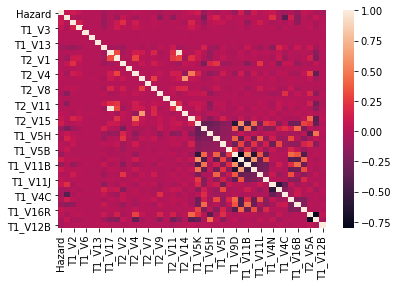

In [77]:
sns.heatmap(hz.corr())

In [78]:
hz.shape

(50999, 44)

In [79]:
x_train=hz[hz["data"]=='train']
x_test=hz[hz["data"]=='test']

In [80]:
x_train.drop('data',1,inplace=True)
x_test.drop('data',1,inplace=True)

x_train.dtypes

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Hazard     float64
T1_V1        int64
T1_V2        int64
T1_V3        int64
T1_V6        int32
T1_V10       int64
T1_V13       int64
T1_V14       int64
T1_V17       int32
T2_V1        int64
T2_V2        int64
T2_V3        int32
T2_V4        int64
T2_V6        int64
T2_V7        int64
T2_V8        int64
T2_V9        int64
T2_V10       int64
T2_V11       int32
T2_V12       int32
T2_V14       int64
T2_V15       int64
T1_V5K       int32
T1_V5A       int32
T1_V5H       int32
T1_V5C       int32
T1_V5I       int32
T1_V5B       int32
T1_V9D       int32
T1_V9E       int32
T1_V11B      int32
T1_V11H      int32
T1_V11L      int32
T1_V11J      int32
T1_V4N       int32
T1_V4B       int32
T1_V4C       int32
T1_V16I      int32
T1_V16B      int32
T1_V16R      int32
T2_V5A       int32
T2_V5B       int32
T1_V12B      int32
dtype: object

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

,VIF Factor,features
0,2.102133,Hazard
1,6.009763,T1_V1
2,5.958677,T1_V2
3,4.504246,T1_V3
4,1.782128,T1_V6
5,4.759373,T1_V10
6,9.808183,T1_V13
7,4.705701,T1_V14
8,18.751877,T1_V17
9,9.042240,T2_V1


In [83]:
x_train.drop('T2_V8',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.101983,Hazard
1,5.999633,T1_V1
2,5.954112,T1_V2
3,4.500021,T1_V3
4,1.781811,T1_V6
5,4.751674,T1_V10
6,9.786502,T1_V13
7,4.702136,T1_V14
8,18.751463,T1_V17
9,9.041115,T2_V1


In [84]:
x_train.drop('T2_V7',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.099882,Hazard
1,5.983278,T1_V1
2,5.947912,T1_V2
3,4.495746,T1_V3
4,1.780580,T1_V6
5,4.745553,T1_V10
6,9.752095,T1_V13
7,4.694348,T1_V14
8,18.751134,T1_V17
9,9.020729,T2_V1


In [85]:
x_train.drop('T1_V5K',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.083705,Hazard
1,5.702331,T1_V1
2,5.902261,T1_V2
3,4.464355,T1_V3
4,1.774988,T1_V6
5,4.672909,T1_V10
6,9.413172,T1_V13
7,4.589902,T1_V14
8,18.750493,T1_V17
9,8.768901,T2_V1


In [86]:
x_train.drop('T1_V17',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.083705,Hazard
1,5.699581,T1_V1
2,5.897128,T1_V2
3,4.464281,T1_V3
4,1.774977,T1_V6
5,4.672762,T1_V10
6,9.413167,T1_V13
7,4.589883,T1_V14
8,8.690779,T2_V1
9,9.420472,T2_V2


In [87]:
x_train.drop('T1_V12B',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.083443,Hazard
1,5.661546,T1_V1
2,5.884962,T1_V2
3,4.452942,T1_V3
4,1.774670,T1_V6
5,4.661735,T1_V10
6,9.321721,T1_V13
7,4.554562,T1_V14
8,8.648495,T2_V1
9,9.362564,T2_V2


In [88]:
x_train.drop('T2_V6',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.083430,Hazard
1,5.660300,T1_V1
2,5.884529,T1_V2
3,4.451963,T1_V3
4,1.774314,T1_V6
5,4.660006,T1_V10
6,9.317180,T1_V13
7,4.553604,T1_V14
8,8.637867,T2_V1
9,9.307742,T2_V2


In [89]:
x_train.drop('T1_V13',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.081171,Hazard
1,5.612587,T1_V1
2,5.874418,T1_V2
3,4.446861,T1_V3
4,1.773139,T1_V6
5,4.642782,T1_V10
6,4.536098,T1_V14
7,8.589780,T2_V1
8,9.236091,T2_V2
9,1.472426,T2_V3


In [90]:
x_train.drop('T2_V2',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.081085,Hazard
1,5.474311,T1_V1
2,5.577746,T1_V2
3,4.439200,T1_V3
4,1.771441,T1_V6
5,4.625913,T1_V10
6,4.523136,T1_V14
7,8.519780,T2_V1
8,1.471762,T2_V3
9,7.835934,T2_V4


In [91]:
x_train.drop('T2_V1',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.080021,Hazard
1,5.472381,T1_V1
2,5.511494,T1_V2
3,4.370695,T1_V3
4,1.770687,T1_V6
5,4.612537,T1_V10
6,4.523108,T1_V14
7,1.471484,T2_V3
8,7.417738,T2_V4
9,4.116100,T2_V9


In [92]:
x_train.drop('T2_V4',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.079182,Hazard
1,5.465049,T1_V1
2,5.459703,T1_V2
3,4.342382,T1_V3
4,1.769531,T1_V6
5,4.593523,T1_V10
6,4.513048,T1_V14
7,1.471062,T2_V3
8,4.103541,T2_V9
9,6.147335,T2_V10


In [93]:
x_train.drop('T1_V9D',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.078696,Hazard
1,5.418764,T1_V1
2,5.417163,T1_V2
3,4.339336,T1_V3
4,1.768841,T1_V6
5,4.590400,T1_V10
6,4.512117,T1_V14
7,1.470836,T2_V3
8,4.097092,T2_V9
9,6.136922,T2_V10


In [94]:
x_train.drop('T2_V5A',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.078571,Hazard
1,5.351399,T1_V1
2,5.403267,T1_V2
3,4.325201,T1_V3
4,1.766667,T1_V6
5,4.562247,T1_V10
6,4.439032,T1_V14
7,1.470009,T2_V3
8,4.033932,T2_V9
9,6.089835,T2_V10


In [95]:
x_train.drop('T2_V10',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.077451,Hazard
1,5.300968,T1_V1
2,5.379884,T1_V2
3,4.310672,T1_V3
4,1.765435,T1_V6
5,4.536763,T1_V10
6,4.408050,T1_V14
7,1.468992,T2_V3
8,4.004946,T2_V9
9,3.944617,T2_V11


In [96]:
x_train.drop('T1_V9E',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif["features"] = x_train.columns
vif

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VIF Factor,features
0,2.070779,Hazard
1,5.233409,T1_V1
2,5.351049,T1_V2
3,4.293173,T1_V3
4,1.762358,T1_V6
5,4.506477,T1_V10
6,4.369768,T1_V14
7,1.468350,T2_V3
8,3.985748,T2_V9
9,3.915274,T2_V11


In [97]:
x_test.drop('T1_V9E',axis=1,inplace=True)
x_test.drop('T2_V10',axis=1,inplace=True)
x_test.drop('T2_V5A',axis=1,inplace=True)
x_test.drop('T1_V9D',axis=1,inplace=True)
x_test.drop('T2_V4',axis=1,inplace=True)
x_test.drop('T2_V1',axis=1,inplace=True)
x_test.drop('T2_V2',axis=1,inplace=True)
x_test.drop('T1_V13',axis=1,inplace=True)
x_test.drop('T2_V6',axis=1,inplace=True)
x_test.drop('T1_V12B',axis=1,inplace=True)
x_test.drop('T1_V17',axis=1,inplace=True)
x_test.drop('T1_V5K',axis=1,inplace=True)
x_test.drop('T2_V7',axis=1,inplace=True)
x_test.drop('T2_V8',axis=1,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [98]:
x1=x_train.drop(['Hazard'],1)
y1=x_train['Hazard']


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=123)

In [102]:
scaler = StandardScaler()

In [103]:
train_scaled = scaler.fit_transform(X_train)

In [104]:
test_scaled = scaler.transform(X_test)

LASSO

In [105]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [106]:
from sklearn.linear_model import Lasso

In [107]:
lambdas=np.linspace(0.01,10,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [108]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error',n_jobs=-1,verbose=10)

In [109]:
grid_search.fit(train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.7s
[Paralle

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.633636...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ])},
             scoring='neg_mean_absolute_error', verbose=10)

In [110]:
grid_search.best_estimator_

Lasso(alpha=0.01)

In [111]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        # np.flatnonzero extracts index of `True` in a boolean array
        candidate = np.flatnonzero(results['rank_test_score'] == i)[0]
        # print rank of the model
        # values passed to function format here are put in the curly brackets when printing
        # 0 , 1 etc refer to placeholder for position of values passed to format function
        # .3f means upto 2 decimal digits
        print("Model with rank: {0}".format(i))
        # this prints cross validated performance and its standard deviation
        print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))
        # prints the paramter combination for which this performance was obtained
        print("Parameters: {0}".format(results['params'][candidate]))
        print("")

In [112]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2.79895 (std: 0.03542)
Parameters: {'alpha': 0.01}

Model with rank: 2
Mean validation score: -2.80777 (std: 0.03601)
Parameters: {'alpha': 0.1109090909090909}

Model with rank: 3
Mean validation score: -2.81934 (std: 0.03713)
Parameters: {'alpha': 0.21181818181818182}

Model with rank: 4
Mean validation score: -2.82699 (std: 0.03817)
Parameters: {'alpha': 0.31272727272727274}

Model with rank: 5
Mean validation score: -2.82826 (std: 0.03982)
Parameters: {'alpha': 0.5145454545454545}



In [113]:
grid_search.best_score_

-2.798954595049141

In [114]:
 test_pred=grid_search.predict(train_scaled)

In [117]:
mean_absolute_error(y_train, grid_search.predict(train_scaled))

2.7963159922084024

In [ ]:
test_pred

In [10]:
(1-2.54/5.4)

0.5296296296296297

In [116]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_train['Hazard'],test_pred)


In [ ]:
submissions=pd.DataFrame({'Hazard':grid_search.predict(x_test)})

In [ ]:
submissions.to_csv('hazard_submitted.csv',index=False)